In [51]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [52]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]
    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

def hist_rgb(hist, title, pos, color):

    ax = plt.subplot(2, 3, pos)
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("Number of Pixels")
    plt.xlim([0, 256])

    for (h, c) in zip(hist, color):
        plt.plot(h, color=c)

plt.figure(figsize=(40, 20))
plt.suptitle("Color histogram equalization with cv2.equalizeHist() - not a good approach", fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Color histogram equalization with cv2.equalizeHist() - not a good approach')

<Figure size 2880x1440 with 0 Axes>

In [53]:
def hist_color_img(img):
    """Calculates the Histogram of a three-channel image"""

    histr = []
    histr.append(cv2.calcHist([img],[0],None,[256],[0, 256]))
    histr.append(cv2.calcHist([img],[1],None,[256],[0, 256]))
    histr.append(cv2.calcHist([img],[2],None,[256],[0, 256]))

    return histr

In [54]:
def equalize_hist_color(img):
    """
    Equalize the image 
    1. splitting the image for three channel
    2. cv2.equalizehHist() to each channels
    3. Merging them all again 
    """
    channels = cv2.split(img)

    eq_channels = []

    for ch in channels:
        eq_channels.append(cv2.equalizeHist(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image

In [55]:
#Loading original image
image = cv2.imread("images/lenna.png")

In [56]:
#Histogram of Original Image
hist_color = hist_color_img(image)

Equalize the Image and Calculate Histogram

In [57]:
image_eq = equalize_hist_color(image)
image_eq_hist = hist_color_img(image_eq)

Adding 15 Pixels to image and calculate Histogram

In [58]:
M = np.ones(image.shape, dtype="uint8") * 15

added_image = cv2.add(image, M)
hist_color_added_image = hist_color_img(added_image)

Equalize added image and calculate Histogram

In [59]:
added_image_eq = equalize_hist_color(added_image)
added_image_eq_hist = hist_color_img(added_image_eq)

Subtract 15 from every pixel (the result will look darker) and calculate histogram


In [60]:
subtracted_image = cv2.subtract(image, M)
hist_color_subtracted_image = hist_color_img(subtracted_image)

Equalize image and calculate histogram

In [61]:
subtracted_image_eq = equalize_hist_color(subtracted_image)
subtracted_image_eq_hist = hist_color_img(subtracted_image_eq)


Plotting the Image and Histogram __Without EQUALIZATION__

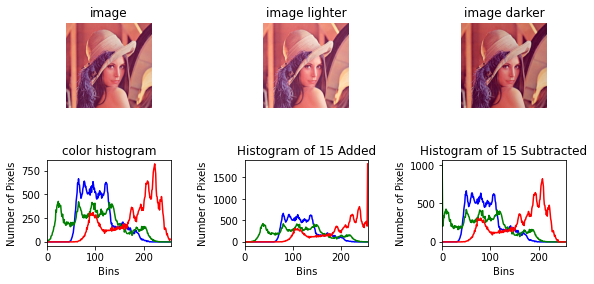

In [62]:
img_plt(image, "image", 1)
hist_rgb(hist_color, "color histogram", 4, ['b', 'g', 'r'])
img_plt(added_image, "image lighter", 2)
hist_rgb(hist_color_added_image, "Histogram of 15 Added", 5, ['b', 'g', 'r'])
img_plt(subtracted_image, "image darker", 3)
hist_rgb(hist_color_subtracted_image, "Histogram of 15 Subtracted", 6, ['b', 'g', 'r'])

plt.subplots_adjust(top=0.9, right=5.2, left=4, wspace=0.6, hspace=0.6)
# plt.tight_layout()
plt.show()


Plotting the images and the histograms __With EQUALIZATION__

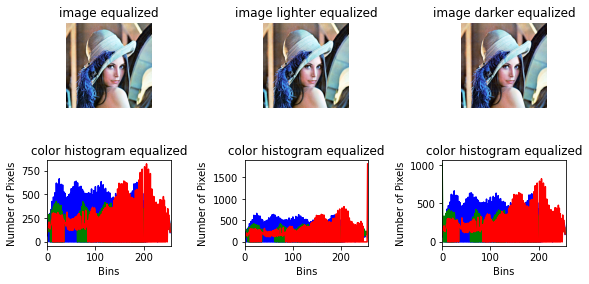

In [63]:
img_plt(image_eq, "image equalized", 1)
hist_rgb(image_eq_hist, "color histogram equalized", 4, ['b', 'g', 'r'])
img_plt(added_image_eq, "image lighter equalized", 2)
hist_rgb(added_image_eq_hist, "color histogram equalized", 5, ['b', 'g', 'r'])
img_plt(subtracted_image_eq, "image darker equalized", 3)
hist_rgb(subtracted_image_eq_hist, "color histogram equalized", 6, ['b', 'g', 'r'])
plt.subplots_adjust(top=0.9, right=5.2, left=4, wspace=0.6, hspace=0.6)
# plt.tight_layout()
plt.show()
